In [1]:
import os
os.getcwd()

'C:\\Users\\a\\git\\practical-statistics-for-data-scientists\\python\\notebooks'

In [2]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [3]:
os.chdir('C:\\Users\\a\\git\\practical-statistics-for-data-scientists')

In [4]:
DATA = Path().resolve() / 'data'
WEB_PAGE_DATA_CSV = DATA / 'web_page_data.csv'
FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
CLICK_RATE_CSV = DATA / 'click_rates.csv'
IMANISHI_CSV = DATA / 'imanishi_data.csv'

In [5]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)

In [6]:
session_times.Time=100*session_times.Time

Text(0.5, 0.98, '')

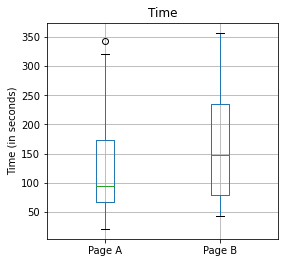

In [7]:
ax=session_times.boxplot(by='Page', column='Time', figsize=(4,4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [8]:
mean_a=session_times[session_times.Page=='Page A'].Time.mean()
mean_b=session_times[session_times.Page=='Page B'].Time.mean()

In [9]:
def perm_fun(x, nA, nB):
    n=nA+nB
    idx_A=set(random.sample(range(n),nA))
    idx_B=set(range(n))-idx_A
    return x.loc[idx_B].mean()-x.loc[idx_A].mean()

Text(0, 0.5, 'Frequency')

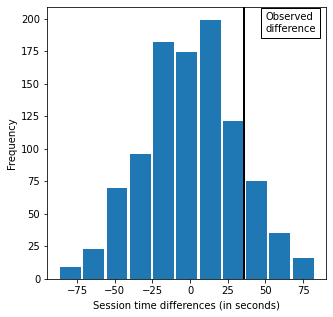

In [10]:
perm_diffs=[perm_fun(session_times.Time, 21, 15) for _ in range(1000)]
fig,ax=plt.subplots(figsize=(5,5))
ax.hist(perm_diffs,bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

In [11]:
np.mean([diff > mean_b-mean_a for diff in perm_diffs])

0.129

Observed difference: 0.0368%


Text(0, 0.5, 'Frequency')

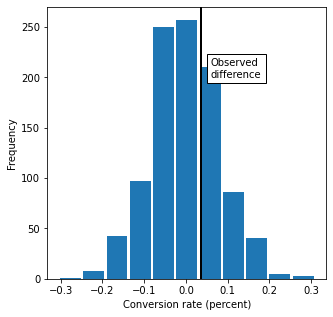

In [12]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588)
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

In [13]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.315

In [14]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [37]:
four_sessions=pd.read_csv(FOUR_SESSIONS_CSV)
observed_var=four_sessions.groupby('Page').mean().var()[0]
print('observed mean:',four_sessions.groupby('Page').mean().values.ravel())
print('observed variance:',observed_var)
def perm_test(df):
    df=df.copy()
    df['Time']=np.random.permutation(df['Time'].values)
    return(df.groupby('Page').mean().var()[0])
per_var=[perm_test(four_sessions) for _ in range (3000)]
print(np.mean([var>observed_var for var in per_var]))


observed mean: [172.8 182.6 175.6 164.6]
observed variance: 55.426666666666655
0.079


AttributeError: 'list' object has no attribute 'plt'

Text(0, 0.5, 'frequency')

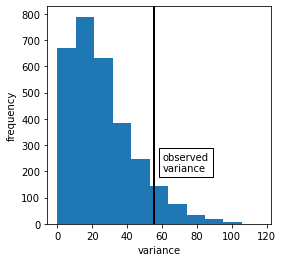

In [56]:
fig,ax=plt.subplots(figsize=(4,4))
ax.hist(per_var,bins=11,rwidth=1)
ax.axvline(x=observed_var, color='black', lw=2)
ax.text(observed_var+5, 200, 'observed\nvariance',bbox={'facecolor':'white'})
ax.set_xlabel('variance')
ax.set_ylabel('frequency')